In [15]:
# Importing the Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config
import warnings
import os, gc
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import  ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.applications import VGG16, ResNet50

warnings.filterwarnings('ignore')
set_config(display='diagram')
gc.collect()
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
print('All Packages Successfully Imported!!')

All Packages Successfully Imported!!


In [16]:
# Listing out the machine and package configurations
gpu = tf.config.list_physical_devices('GPU')

if gpu:
    print(f'GPU Available and it is {gpu}')
    print(f'The tensorflow version which is used in the current workspace {tf.__version__}')
    print(f'The current working directory {os.getcwd()}')
else:
    print('No GPU!!')
    print(f'The tensorflow version which is used in the current workspace {tf.__version__}')
    print(f'The current working directory {os.getcwd()}')

GPU Available and it is [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
The tensorflow version which is used in the current workspace 2.10.1
The current working directory C:\Users\sayan\PycharmProjects\Machine Learning\Horse or Humans


In [17]:
# Setting up the training images path
train_images_path = os.path.join(os.getcwd(),'train_horse-or-human/')

train_horse_image_path = os.path.join(train_images_path,'horses/')
train_human_image_path = os.path.join(train_images_path,'humans/')

number_horse_images = len(os.listdir(train_horse_image_path))
number_human_images = len(os.listdir(train_human_image_path))

print(f'The path of the training images is located at {train_images_path}')
print(f'\nThe directory contain following list of items: \n{os.listdir(train_images_path)}')
print(f'\nNumber of horse images are {number_horse_images}')
print(f'\nNumber of human images are {number_human_images}')

The path of the training images is located at C:\Users\sayan\PycharmProjects\Machine Learning\Horse or Humans\train_horse-or-human/

The directory contain following list of items: 
['horses', 'humans']

Number of horse images are 628

Number of human images are 655


In [18]:
# Setting up the validation image path
validation_images_path = os.path.join(os.getcwd(),'validation-horse-or-human/')

validation_horse_image_path = os.path.join(validation_images_path,'horses/')
validation_human_image_path = os.path.join(validation_images_path,'humans/')

number_validation_horse_images = len(os.listdir(validation_horse_image_path))
number_validation_human_images = len(os.listdir(validation_human_image_path))

print(f'The path of the training images is located at {validation_images_path}')
print(f'\nThe directory contain following list of items: \n{os.listdir(validation_images_path)}')
print(f'\nNumber of horse images are {number_validation_horse_images}')
print(f'\nNumber of human images are {number_validation_human_images}')

The path of the training images is located at C:\Users\sayan\PycharmProjects\Machine Learning\Horse or Humans\validation-horse-or-human/

The directory contain following list of items: 
['horses', 'humans']

Number of horse images are 128

Number of human images are 128


In [19]:
# Defining the Training Image Data generator
train_image_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=45,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_images = train_image_generator.flow_from_directory(directory=train_images_path,
                                                   classes=['horses', 'humans'],
                                                   seed=42,
                                                   shuffle=True,
                                                   batch_size=32,
                                                   target_size=(300, 300)
                                                   )

print(train_images_path)

Found 1283 images belonging to 2 classes.
C:\Users\sayan\PycharmProjects\Machine Learning\Horse or Humans\train_horse-or-human/


In [20]:
# Defining Validation Image Data Generator
validation_image_generator = ImageDataGenerator(
    rescale=1.0 / 255
)

validation_images = validation_image_generator.flow_from_directory(directory=validation_images_path,
                                                   classes=['horses', 'humans'],
                                                   batch_size=32,
                                                   target_size=(300, 300)
                                                   )

print(validation_images_path)

Found 256 images belonging to 2 classes.
C:\Users\sayan\PycharmProjects\Machine Learning\Horse or Humans\validation-horse-or-human/


The number of horse images are 628


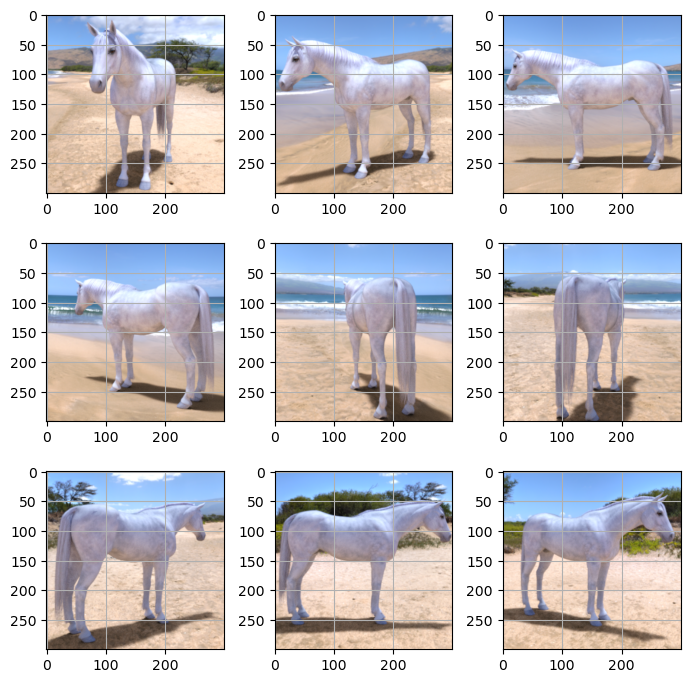

In [21]:
# Displaying the training set horse images
fig, axs = plt.subplots(nrows=3,ncols=3, figsize = (7,7))

horse_images = os.listdir(train_horse_image_path)

print(f'The number of horse images are {len(horse_images)}')

for index, ax in enumerate(axs.flatten()):
    image = Image.open(os.path.join(train_horse_image_path, horse_images[index]))
    ax.imshow(image)
    ax.grid('off')

plt.tight_layout()

The number of horse images are 655


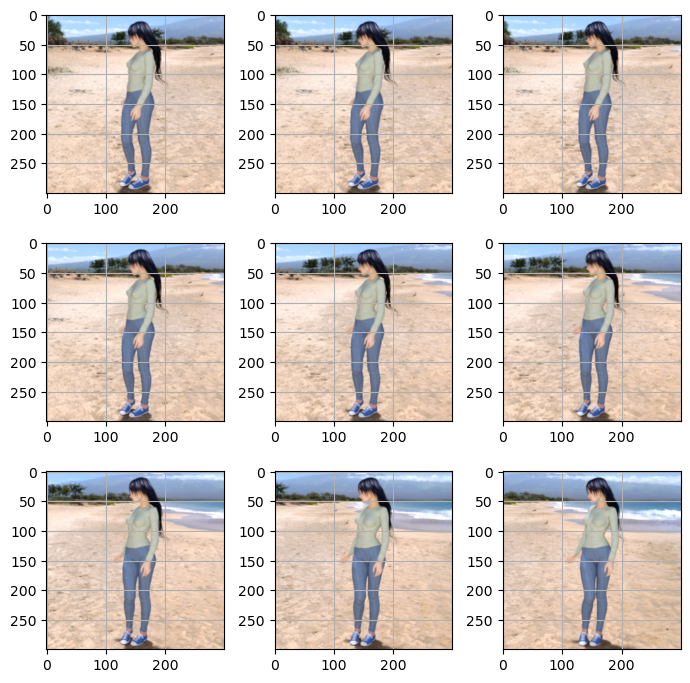

In [22]:
# Displaying the training human images
fig, axs = plt.subplots(nrows=3,ncols=3, figsize = (7,7))

human_images = os.listdir(train_human_image_path)

print(f'The number of horse images are {len(human_images)}')

for index, ax in enumerate(axs.flatten()):
    image = Image.open(os.path.join(train_human_image_path, human_images[index]))
    ax.imshow(image)
    ax.grid('off')

plt.tight_layout()
plt.show()

In [23]:
# Defining the baseline model
model_1 = tf.keras.models.Sequential(
    [
        keras.layers.Conv2D(input_shape=(300, 300, 3), filters=16, activation='elu', kernel_initializer='he_normal',kernel_size=(3,3),
                            kernel_regularizer=keras.regularizers.l2()),
        keras.layers.AvgPool2D(pool_size=(3, 3)),
        keras.layers.Conv2D(filters=32, activation='relu', kernel_initializer='he_normal', kernel_size=(3,3)),
        keras.layers.Conv2D(filters=10, activation='tanh',kernel_size=(3,3)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=10, activation='relu'),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Dense(units=2, activation='softmax')
    ]
)

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 95, 95, 10)        2890      
                                                                 
 flatten (Flatten)           (None, 90250)             0         
                                                                 
 dense (Dense)               (None, 10)                902510    
                                                        

In [10]:
model_1.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.05))

In [31]:
model_1_history = model_1.fit(
    train_images,
    validation_data=validation_images,
    epochs=10,
    verbose=1
)

Epoch 1/10
21/21 [==============================] - 28s 1s/step - loss: 124.5296 - accuracy: 0.4957 - val_loss: 1.0901 - val_accuracy: 0.5000
Epoch 2/10
21/21 [==============================] - 24s 1s/step - loss: 1.0401 - accuracy: 0.4942 - val_loss: 0.9778 - val_accuracy: 0.5000
Epoch 3/10
21/21 [==============================] - 24s 1s/step - loss: 0.9263 - accuracy: 0.5043 - val_loss: 0.8789 - val_accuracy: 0.5000
Epoch 4/10
21/21 [==============================] - 24s 1s/step - loss: 0.8550 - accuracy: 0.5051 - val_loss: 0.8210 - val_accuracy: 0.5000
Epoch 5/10
21/21 [==============================] - 25s 1s/step - loss: 0.7960 - accuracy: 0.5004 - val_loss: 0.7749 - val_accuracy: 0.5000
Epoch 6/10
21/21 [==============================] - 24s 1s/step - loss: 0.7621 - accuracy: 0.4809 - val_loss: 0.7451 - val_accuracy: 0.5000
Epoch 7/10
21/21 [==============================] - 25s 1s/step - loss: 0.7362 - accuracy: 0.5105 - val_loss: 0.7266 - val_accuracy: 0.5000
Epoch 8/10
21/21 [

In [11]:
model_vgg16 = VGG16(weights='imagenet', include_top=True)

model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model_vgg16 = keras.models.Model(inputs = model_vgg16.input, outputs = model_vgg16.layers[-2].output)

model_vgg16.summary()

for layer in model_vgg16.layers:
    layer.trainable = False

for layer in model_vgg16.layers[-2:]:
    layer.trainable = True

model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
x = model_vgg16.output
x = keras.layers.Dense(units=16, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(units=1, activation='sigmoid')(x)

model_vgg16 = keras.models.Model(inputs = model_vgg16.inputs, outputs = x)

model_vgg16.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [24]:
model_vgg16_history = model_vgg16.fit(
    train_images,
    validation_data=validation_images,
    epochs=10,
    verbose=1
)

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/block1_conv2/Relu' defined at (most recent call last):
    File "C:\Users\sayan\anaconda3\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\sayan\anaconda3\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\sayan\anaconda3\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\sayan\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\sayan\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sayan\AppData\Local\Temp\ipykernel_26324\1878712295.py", line 1, in <module>
      model_vgg16_history = model_vgg16.fit(
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\sayan\anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'model_1/block1_conv2/Relu'
OOM when allocating tensor with shape[32,64,300,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/block1_conv2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1885]